In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import requests 
import pandas_datareader.data as web
from io import StringIO
import yfinance as yf

c:\Users\Victor.moreira\AppData\Local\miniconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
### Coletando a taxa de cambio USD/BRL

import pandas as pd

# URL da API do Banco Central (série 1: USD/BRL)
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.1/dados?formato=csv"

# Baixar e carregar os dados
df_cambio = pd.read_csv(url, sep=";", parse_dates=["data"])

# Renomear coluna para facilitar
df_cambio.rename(columns={"valor": "USD_BRL"}, inplace=True)

# Converter a coluna "USD_BRL" para numérico (caso esteja como string)
df_cambio["USD_BRL"] = df_cambio["USD_BRL"].astype(str).str.replace(",", ".")
df_cambio["USD_BRL"] = pd.to_numeric(df_cambio["USD_BRL"], errors='coerce')

# Definir a coluna "data" como índice
df_cambio.set_index("data", inplace=True)

# Filtrar somente os dados após 1996
df_cambio = df_cambio.loc[df_cambio.index >= "1999-01-01"]

# Calcular a média mensal da taxa de câmbio
df_cambio_m = df_cambio.resample("M").mean()

# Exibir os primeiros valores
print(df_cambio_m.head())

             USD_BRL
data                
1999-01-31  1.501915
1999-02-28  1.913683
1999-03-31  1.896822
1999-04-30  1.694068
1999-05-31  1.683514


C:\Users\Victor.moreira\AppData\Local\Temp\ipykernel_12944\632323550.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cambio = pd.read_csv(url, sep=";", parse_dates=["data"])
C:\Users\Victor.moreira\AppData\Local\Temp\ipykernel_12944\632323550.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cambio_m = df_cambio.resample("M").mean()


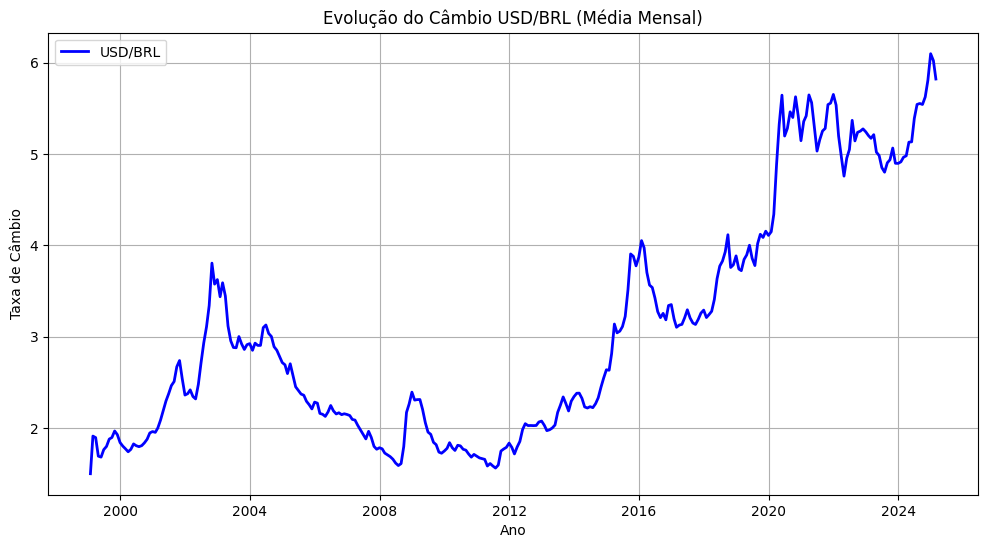

In [4]:

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_cambio_m.index, df_cambio_m["USD_BRL"], label="USD/BRL", color='blue', linewidth=2)

# Personalização do gráfico
plt.title("Evolução do Câmbio USD/BRL (Média Mensal)")
plt.xlabel("Ano")
plt.ylabel("Taxa de Câmbio")
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()



In [5]:
### Usando última cotação do mês 
### Coletando a taxa de cambio USD/BRL

import pandas as pd

# URL da API do Banco Central (série 1: USD/BRL)
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.1/dados?formato=csv"

# Baixar e carregar os dados
df_cambio1 = pd.read_csv(url, sep=";", parse_dates=["data"])

# Renomear coluna para facilitar
df_cambio1.rename(columns={"valor": "USD_BRL"}, inplace=True)

# Converter a coluna "USD_BRL" para numérico (caso esteja como string)
df_cambio1["USD_BRL"] = df_cambio1["USD_BRL"].astype(str).str.replace(",", ".")
df_cambio1["USD_BRL"] = pd.to_numeric(df_cambio1["USD_BRL"], errors='coerce')

# Definir a coluna "data" como índice
df_cambio1.set_index("data", inplace=True)

# Filtrar somente os dados após 1996
df_cambio1 = df_cambio1.loc[df_cambio1.index >= "1999-01-01"]

# Calcular a média mensal da taxa de câmbio
df_cambio_m1 = df_cambio1.resample("M").last()

# Exibir os primeiros valores
print(df_cambio_m1.head())


            USD_BRL
data               
1999-01-31   1.9832
1999-02-28   2.0648
1999-03-31   1.7220
1999-04-30   1.6607
1999-05-31   1.7240


C:\Users\Victor.moreira\AppData\Local\Temp\ipykernel_12944\995768737.py:10: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_cambio1 = pd.read_csv(url, sep=";", parse_dates=["data"])
C:\Users\Victor.moreira\AppData\Local\Temp\ipykernel_12944\995768737.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_cambio_m1 = df_cambio1.resample("M").last()


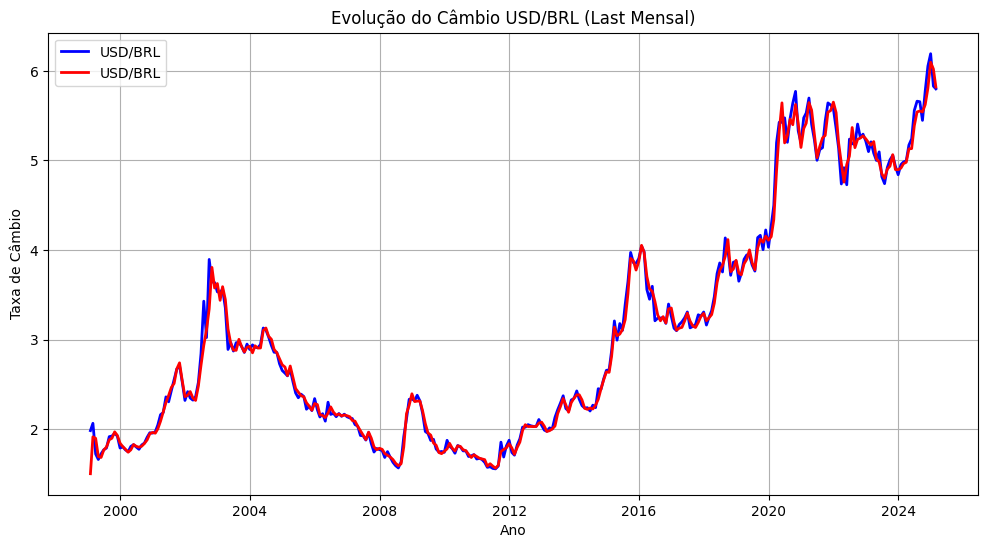

In [6]:

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_cambio_m1.index, df_cambio_m1["USD_BRL"], label="USD/BRL", color='blue', linewidth=2)
plt.plot(df_cambio_m.index, df_cambio_m["USD_BRL"], label="USD/BRL", color='red', linewidth=2)


# Personalização do gráfico
plt.title("Evolução do Câmbio USD/BRL (Last Mensal)")
plt.xlabel("Ano")
plt.ylabel("Taxa de Câmbio")
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()


In [43]:
df_dadosmoedas = pd.concat([df_cambio_m1,df_cambio_m], axis=1)
# Renomear colunas para identificar corretamente cada série
df_dadosmoedas.columns = ["USD_BRL_fechamento", "USD_BRL_média"]

df_dadosmoedas.to_excel('dadosmoedas.xlsx')

In [7]:
### Coletando dados do IPCA (Brasil)

url_ipca = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=csv"
df_ipca = pd.read_csv(url_ipca, sep=";", parse_dates=["data"])
df_ipca.rename(columns={"valor": "IPCA"}, inplace=True)

# Definir a coluna "data" como índice
df_ipca.set_index("data", inplace=True)

# Filtrar somente os dados após 1999
df_ipca = df_ipca.loc[df_ipca.index >= "1999-01-01"]


In [25]:
# df_ipca.to_excel('dadosipca.xlsx')

In [10]:
### Inflação EUA

df_cpi_usa = web.DataReader("CPIAUCSL", "fred", start="2000-01-01")

# Garantir que os dados do CPI já estão mensais
df_cpi_usa.index = df_cpi_usa.index.to_period("M")

# Calcular a variação m/m
df_cpi_usa["CPI_m/m"] = df_cpi_usa["CPIAUCSL"].pct_change() * 100  # Variação percentual

# Manter apenas a variação mensal do CPI
df_cpi_usa = df_cpi_usa[["CPI_m/m"]].rename(columns={"CPI_m/m": "CPI"})


print(df_cpi_usa.head())


              CPI
DATE             
2000-01       NaN
2000-02  0.413467
2000-03  0.588235
2000-04 -0.058480
2000-05  0.175541


In [24]:
# df_cpi_usa.to_excel('dadoscpi.xlsx')

In [12]:
# Taxa SELIC (Brasil)
# URL da API do Banco Central (série 432: Taxa SELIC)
url_selic = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados?formato=csv"

# Baixar e carregar os dados
df_selic = pd.read_csv(url_selic, sep=";", parse_dates=["data"])

# Renomear a coluna "valor" para "SELIC"
df_selic.rename(columns={"valor": "SELIC"}, inplace=True)

# 🔥 Corrigir possíveis vírgulas nos valores numéricos e converter para float
df_selic["SELIC"] = df_selic["SELIC"].astype(str).str.replace(",", ".")
df_selic["SELIC"] = pd.to_numeric(df_selic["SELIC"], errors="coerce")

# Garantir que a coluna "data" está no formato datetime
df_selic["data"] = pd.to_datetime(df_selic["data"], errors="coerce")


# Remover valores NaN corretamente
df_selic.dropna(inplace=True)

# Definir "data" como índice
df_selic.set_index("data", inplace=True)

# Aplicar resample para calcular a média mensal da SELIC
df_selic_m = df_selic.resample("ME").mean()

# Exibir os primeiros valores após resample
print("\nSérie mensal da SELIC:")
print(df_selic_m.head())


Série mensal da SELIC:
                SELIC
data                 
1999-01-31  23.833333
1999-02-28  23.833333
1999-03-31  23.833333
1999-04-30  23.833333
1999-05-31  25.950000


In [23]:
# df_selic_m.to_excel('dadoselic.xlsx')

In [15]:
 ###Taxa Fed Funds Rate (EUA)
df_fed = web.DataReader("FEDFUNDS", "fred", start="2000-01-01")

# Aplicar resample para calcular a média mensal da SELIC
df_fed_m = df_fed.resample("ME").mean()

print(df_fed_m.tail())

            FEDFUNDS
DATE                
2024-09-30      5.13
2024-10-31      4.83
2024-11-30      4.64
2024-12-31      4.48
2025-01-31      4.33


In [22]:
# df_fed_m.to_excel('dadosfedf.xlsx')

In [16]:
### PIB EUA

df_gdp_usa = web.DataReader("GDP", "fred", start="2000-01-01")
print(df_gdp_usa.head())


                  GDP
DATE                 
2000-01-01  10002.179
2000-04-01  10247.720
2000-07-01  10318.165
2000-10-01  10435.744
2001-01-01  10470.231


In [17]:
### Termos de Troca Brasil

# Código correto da série de Termos de Troca (Mensal)
codigo_serie = "FUNCEX12_TTR12"

# URL para obter os dados históricos dessa série
url_ipea = f"http://ipeadata.gov.br/api/odata4/ValoresSerie(SERCODIGO='{codigo_serie}')"

# Requisição à API
response = requests.get(url_ipea)

# Verificar se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()
    
    # Converter os dados para um DataFrame
    df_ipea = pd.DataFrame(data['value'])

    # Renomear colunas corretamente, se existirem
    if "VALDATA" in df_ipea.columns and "VALVALOR" in df_ipea.columns:
        df_ipea.rename(columns={"VALVALOR": "Termos_de_Troca", "VALDATA": "Data"}, inplace=True)

        # 📌 Passo 1: Verificar se a coluna "Data" tem timezone
        print(df_ipea["Data"].dtype)

        # 📌 Passo 2: Converter para datetime sem timezone
        df_ipea["Data"] = pd.to_datetime(df_ipea["Data"], utc=True).dt.tz_convert(None)

        # 📌 Passo 3: Definir "Data" como índice
        df_ipea.set_index("Data", inplace=True)

        # 📌 Passo 4: Filtrar os dados a partir de 1999
        df_ipea = df_ipea[df_ipea.index >= pd.to_datetime("1999-01-01")]

        # Exibir os primeiros valores
        print(df_ipea.head())
    else:
        print("As colunas esperadas não estão no DataFrame. Verifique a estrutura da API.")

else:
    print(f"Erro na requisição: {response.status_code}")


object
                          SERCODIGO  Termos_de_Troca NIVNOME TERCODIGO
Data                                                                  
1999-01-01 02:00:00  FUNCEX12_TTR12            90.81                  
1999-02-01 02:00:00  FUNCEX12_TTR12            86.50                  
1999-03-01 03:00:00  FUNCEX12_TTR12            86.84                  
1999-04-01 03:00:00  FUNCEX12_TTR12            83.94                  
1999-05-01 03:00:00  FUNCEX12_TTR12            82.76                  


In [18]:
# Manter apenas a coluna "Termos_de_Troca"
df_ipea_clean = df_ipea[["Termos_de_Troca"]]

# Exibir os primeiros valores do DataFrame limpo
print(df_ipea_clean.head())

                     Termos_de_Troca
Data                                
1999-01-01 02:00:00            90.81
1999-02-01 02:00:00            86.50
1999-03-01 03:00:00            86.84
1999-04-01 03:00:00            83.94
1999-05-01 03:00:00            82.76


In [21]:
# df_ipea_clean.to_excel('dadostot.xlsx')


In [ ]:

# Código da série do IPEADATA
codigo_ipea = "GAC12_TCERXB12"
url = f"http://ipeadata.gov.br/api/odata4/ValoresSerie(SERCODIGO='{codigo_ipea}')"

# Adicionar cabeçalho para evitar bloqueios
headers = {"User-Agent": "Mozilla/5.0"}

# Fazer requisição e carregar os dados
response = requests.get(url, headers=headers)
data = response.json()

# Criar DataFrame
df_reer = pd.DataFrame(data.get("value", []))  

# df_reer.to_excel('dadoREER.xlsx')

C:\Users\Victor.moreira\AppData\Local\Temp\ipykernel_12944\134102707.py:19: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_reer["Data"] = pd.to_datetime(df_reer["Data"].astype(str), errors="coerce", dayfirst=True)


AttributeError: Can only use .dt accessor with datetimelike values

In [62]:
# 🔹 Coletar Conta Corrente (% PIB) do Banco Central do Brasil
url_cc = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.22505/dados?formato=csv"
df_cc = pd.read_csv(url_cc, sep=";", parse_dates=["data"])
df_cc.rename(columns={"valor": "Conta_Corrente_PIB", "data": "Data"}, inplace=True)
df_cc["Data"] = pd.to_datetime(df_cc["Data"]).dt.to_period("M")
df_cc.set_index("Data", inplace=True)

HTTPError: HTTP Error 403: Forbidden

In [65]:

# URL da API do Banco Central do Brasil
url_cc = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.22505/dados?formato=csv"

# Adicionando um User-Agent para evitar bloqueio
headers = {"User-Agent": "Mozilla/5.0"}

# Fazendo a requisição
response = requests.get(url_cc, headers=headers)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    # Convertendo os dados para um DataFrame
    df_cc = pd.read_csv(StringIO(response.text), sep=";", parse_dates=["data"])
    
    # Renomeando colunas
    df_cc.rename(columns={"valor": "Conta_Corrente_PIB", "data": "Data"}, inplace=True)
    
    # Convertendo para datetime e ajustando para frequência mensal
    df_cc["Data"] = pd.to_datetime(df_cc["Data"]).dt.to_period("M")

    # Definir Data como índice
    df_cc.set_index("Data", inplace=True)
    
    # Exibir DataFrame corrigido
    import ace_tools as tools
    tools.display_dataframe_to_user(name="Conta Corrente (% PIB)", dataframe=df_cc)

else:
    print(f"Erro ao baixar os dados: {response.status_code}")


ValueError: Missing column provided to 'parse_dates': 'data'

In [70]:

# URL da API do Banco Central do Brasil
url_cc = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.22505/dados?formato=csv"

# Adicionando um User-Agent para evitar bloqueio
headers = {"User-Agent": "Mozilla/5.0"}

# Fazendo a requisição
response = requests.get(url_cc, headers=headers)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    # Lendo os primeiros caracteres da resposta para debug
    print(response.text[:500])  # Mostra os primeiros 500 caracteres da resposta

    # Criando DataFrame
    df_cc = pd.read_csv(StringIO(response.text), sep=";")

    # Verificando nomes das colunas
    print(df_cc.columns)

    # Renomeando colunas corretamente
    df_cc.rename(columns={"valor": "Conta_Corrente_PIB", "data": "Data"}, inplace=True)

    # Verificando se "Data" está presente
    if "Data" in df_cc.columns:
        df_cc["Data"] = pd.to_datetime(df_cc["Data"])
        df_cc["Data"] = df_cc["Data"].dt.to_period("M")
        df_cc.set_index("Data", inplace=True)
    else:
        print("Erro: A coluna 'Data' não foi encontrada no DataFrame.")

    # Exibir DataFrame corrigido
    import ace_tools as tools
    tools.display_dataframe_to_user(name="Conta Corrente (% PIB)", dataframe=df_cc)

else:
    print(f"Erro ao baixar os dados: {response.status_code}")


Erro ao baixar os dados: 403


In [90]:
# Coletar os dados do petróleo Brent
ticker = "CL=F"
df_oil = yf.download(ticker, start="2000-01-01", progress=False)

# Resample para obter preços médios mensais
df_oil = df_oil["Adj Close"].resample("ME").mean().to_frame()

# Renomear colunas
df_oil.rename(columns={"Adj Close": "Oil_Price"}, inplace=True)

# Ajustar frequência mensal
df_oil.index = df_oil.index.to_period("M")

# Exibir as primeiras linhas
print(df_oil.head())  # Exibe no console

         Oil_Price
Date              
2000-08  32.545714
2000-09  33.871000
2000-10  32.973182
2000-11  34.264500
2000-12  28.355000


In [ ]:
# df_oil.to_excel('dadosoil1.xlsx')

In [85]:
# Coletar os dados do VIX (Índice de Volatilidade do Mercado)
ticker = "^VIX"
df_vix = yf.download(ticker, start="2000-01-01", progress=False)

# Resample para obter preços médios mensais
df_vix = df_vix["Adj Close"].resample("ME").mean().to_frame()

# Renomear colunas
df_vix.rename(columns={"Adj Close": "VIX"}, inplace=True)

# Ajustar frequência mensal
df_vix.index = df_vix.index.to_period("M")

# Exibir as primeiras linhas
print(df_vix.head())  # Exibe no console


               VIX
Date              
2000-01  23.202000
2000-02  23.595500
2000-03  22.718261
2000-04  27.164211
2000-05  26.373182


In [87]:
# df_vix.to_excel('dadovix.xlsx')

In [2]:
df_base = pd.read_excel('base.xlsx')

In [3]:
df_base.set_index('DATA', inplace=True)

In [4]:
df_base.dropna()

,IPCA,TOT,FEDFUNDS,CPI,SELIC,USD_BRL_fechamento,USD_BRL_média,Cambio_Real_IPA,Tr. Cor. Ac.12 m / PIB %,OIL,VIX
DATA,,,,,,,,,,,
2000-01-01,0.62,82.45,5.45,0.000000,17.708333,1.8024,1.803724,203.438730,-4.20,31.508439,23.202000
2000-02-01,0.13,87.95,5.73,0.413467,17.708333,1.7685,1.775290,197.498079,-4.19,31.327077,23.595500
2000-03-01,0.22,87.55,5.85,0.588235,17.708333,1.7473,1.742033,195.498003,-4.14,31.151662,22.718261
2000-04-01,0.42,86.41,6.02,-0.058480,17.708333,1.8067,1.768168,197.774822,-4.18,30.937873,27.164211
2000-05-01,0.01,88.92,6.27,0.175541,17.708333,1.8266,1.827932,197.724183,-4.16,30.844358,26.373182
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,0.38,115.01,5.33,0.154928,10.916667,5.6621,5.542048,111.665135,-1.35,80.481364,14.470000
2024-08-01,-0.02,112.76,5.33,0.187221,10.916667,5.6562,5.552614,118.367544,-1.65,75.433637,19.312273
2024-09-01,0.44,114.71,5.13,0.179867,10.895833,5.4481,5.541567,122.773224,-1.92,69.372499,17.769000
